<a href="https://colab.research.google.com/github/Farazmghm/Portfolio/blob/main/customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [95]:
df=pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

In [96]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [97]:
df.shape

(200, 5)

In [98]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [99]:
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [101]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [102]:
df.nunique()

,0
CustomerID,200
Gender,2
Age,51
Annual Income (k$),64
Spending Score (1-100),84


In [103]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


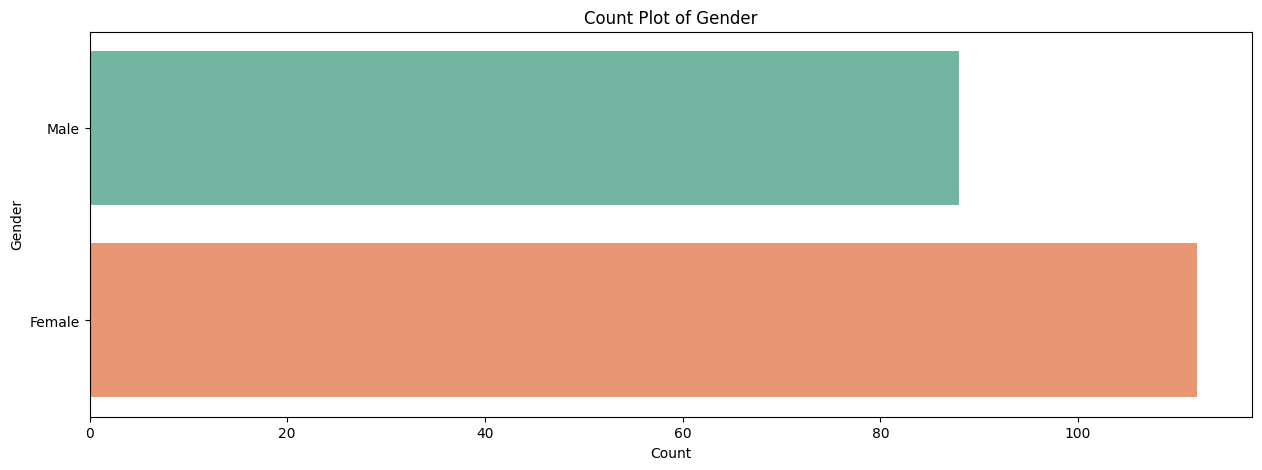

In [104]:
plt.figure(1, figsize=(15, 5))
sns.countplot(y='Gender', data=df, palette='Set2')
plt.title('Count Plot of Gender')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.show()

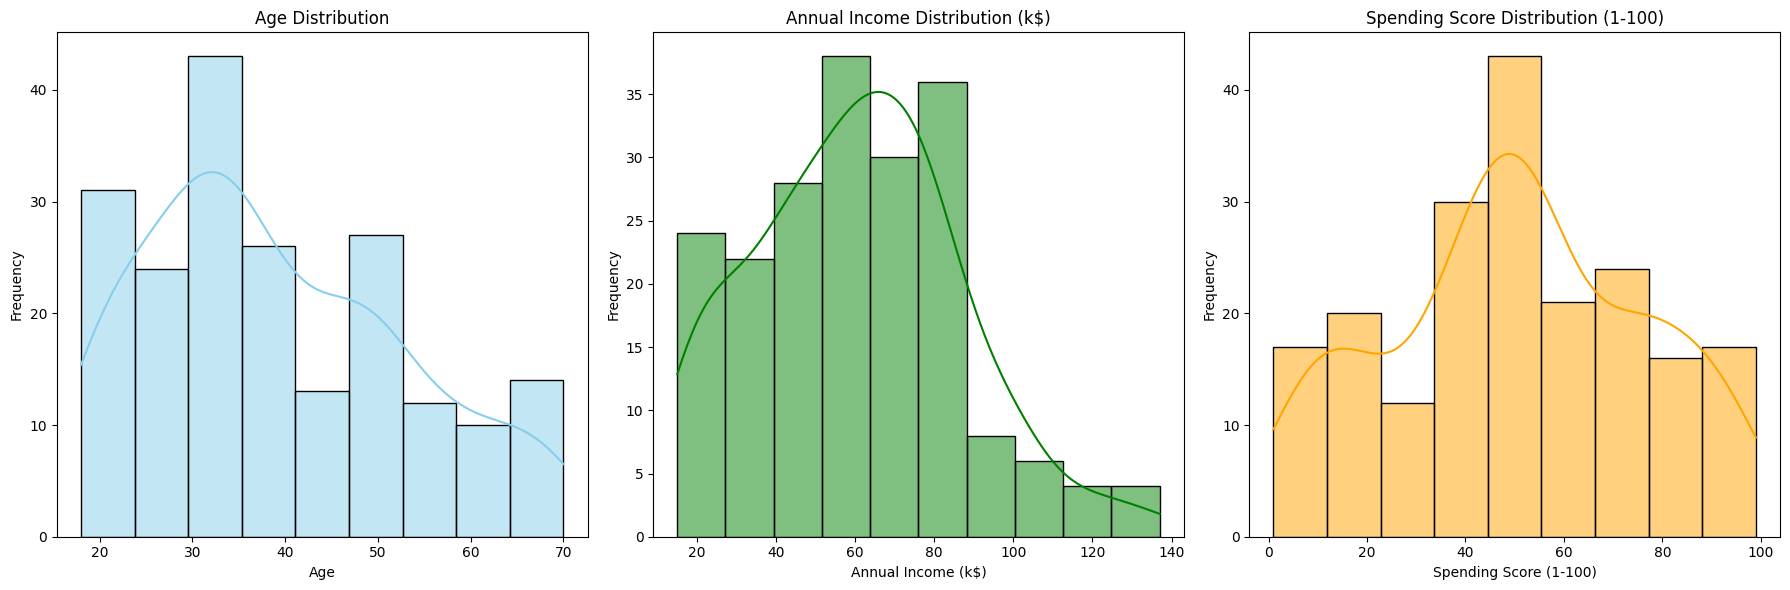

In [105]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(df['Age'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

sns.histplot(df['Annual Income (k$)'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Annual Income Distribution (k$)')
axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Frequency')


sns.histplot(df['Spending Score (1-100)'], kde=True, ax=axes[2], color='orange')
axes[2].set_title('Spending Score Distribution (1-100)')
axes[2].set_xlabel('Spending Score (1-100)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

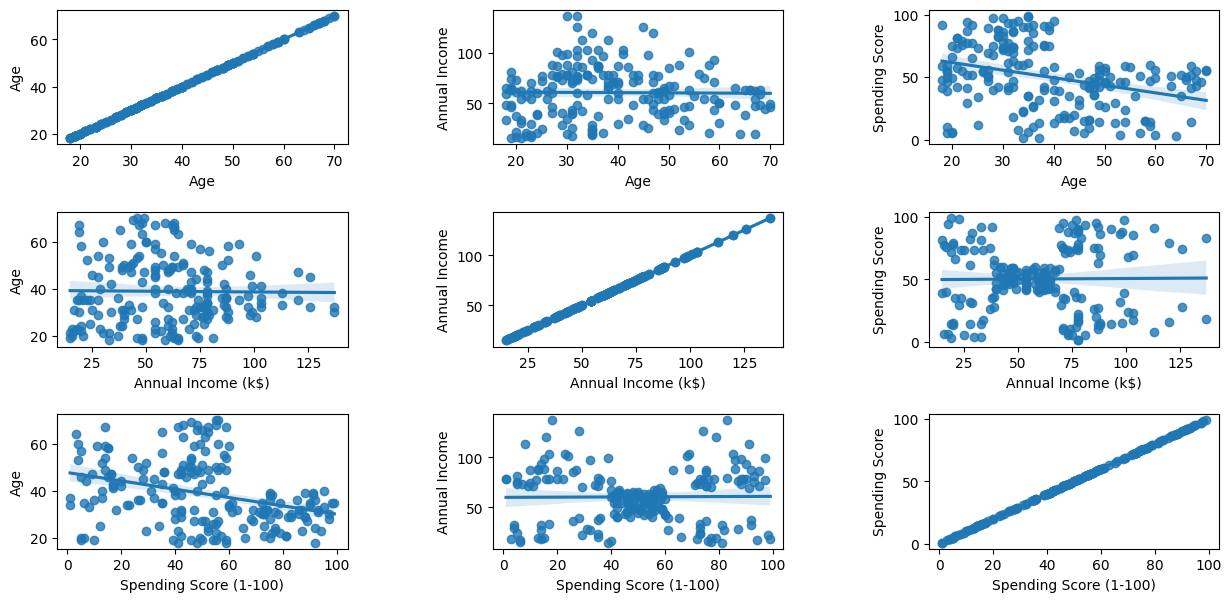

In [106]:
plt.figure(1 , figsize = (15 , 7))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

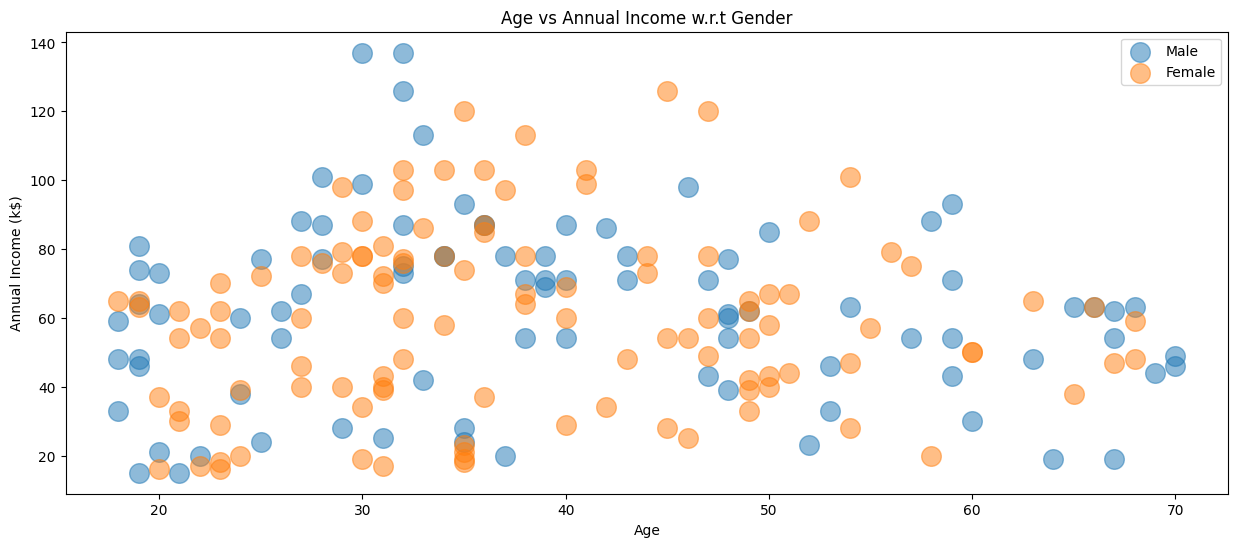

In [107]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

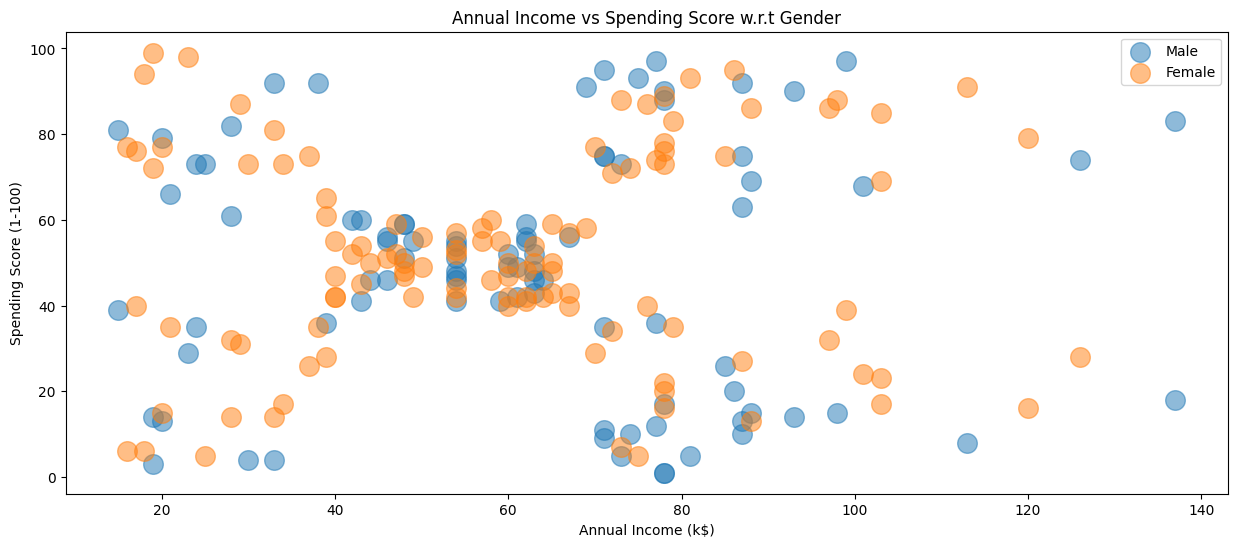

In [108]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

In [109]:

# df['Gender']=df['Gender'].map({'Male':0,'Female':1})
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

In [110]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wcss=[]
for i in range(1,12):
  kmeans=KMeans(n_clusters=i, init='k-means++',random_state=42)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)
wcss

[975512.06,
 387065.7137713772,
 271396.5629660314,
 195401.19855991477,
 157505.7207247758,
 122751.82366097956,
 113329.53676882904,
 86202.7732341036,
 82250.94957264951,
 75284.7825534327,
 65920.00704412548]

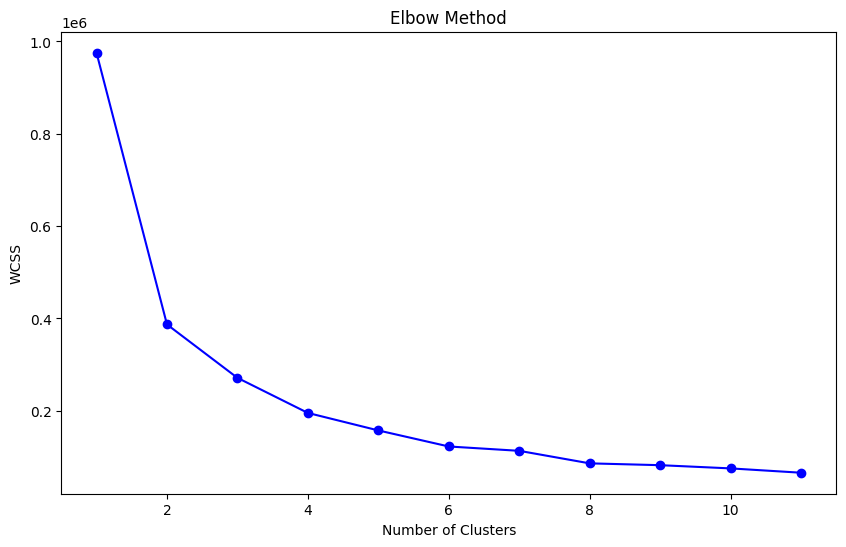

In [111]:
plt.figure(figsize=(10,6))
plt.plot(range(1,12),wcss,marker='o',linestyle='-',color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [112]:
k=4
kmeans=KMeans(n_clusters=k,init='k-means++',random_state=42)
predicted_labels=kmeans.fit_predict(df)

In [113]:
cluster = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=250,
                          random_state= 42 , algorithm='elkan') )
cluster.fit(df)
labels1 = cluster.labels_
centroids1 = cluster.cluster_centers_
cluster.inertia_

195401.19855991477